# Trabalho No. 4

- Aluno: Guilherme Lisboa de Oliveira (GRR20170414)

```{admonition} Questões

O arquivo de dados http://leg.ufpr.br/~lucambio/CE017/20222S/paralytic-polio.csv contém informações anuais do número de casos e do número de mortes relatadas por poliomielite paralítica, nos Estados Unidos entre 1910 e 2019 com as seguintes variáveis:

**Entity** assume somente o valor United States

**Code** sempre USA

**Year** ano de informação, entre 1910 e 2019

**Cases** número de casos registrados

**Deaths** número de mortes anuais registradas por poliomielite

Analise o número de mortes relatadas por poliomielite paralítica, nos Estados Unidos, segundo o número de casos registrados.
```

In [215]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import pandas as pd
import numpy as np

Carregando os dados:

In [216]:
dados = pd.read_csv('./dados/paralytic-polio.csv', index_col='Year')
dados.index = pd.to_datetime(dados.index, format='%Y')
dados.index
dados

,Entity,Code,Cases,Deaths
Year,,,,
1910-01-01,United States,USA,5861,950.0
1911-01-01,United States,USA,1931,440.0
1913-01-01,United States,USA,1934,421.0
1914-01-01,United States,USA,1220,329.0
1915-01-01,United States,USA,1634,691.0
...,...,...,...,...
2015-01-01,United States,USA,0,0.0
2016-01-01,United States,USA,0,0.0
2017-01-01,United States,USA,0,0.0


Analisando tipos de variáveis:

In [217]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 1910-01-01 to 2019-01-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  109 non-null    object 
 1   Code    109 non-null    object 
 2   Cases   109 non-null    int64  
 3   Deaths  104 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.3+ KB


Nota-se que **Deaths** contém dados faltantes e está definida como *float*. Como há poucas entradas, descartamos os dados faltantes e convertemos para *int*:

In [218]:
dados = dados.dropna()
dados.Deaths = pd.to_numeric(dados.Deaths, downcast='integer')

dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 1910-01-01 to 2019-01-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  104 non-null    object
 1   Code    104 non-null    object
 2   Cases   104 non-null    int64 
 3   Deaths  104 non-null    int16 
dtypes: int16(1), int64(1), object(2)
memory usage: 3.5+ KB


In [219]:
dados.nunique()

Entity     1
Code       1
Cases     73
Deaths    64
dtype: int64

Vemos que **Entity** possui apenas "United States" como valor e **Code** também apenas "USA". Assim, descartamos estas variáveis:

In [220]:
dados = dados.drop(['Entity', 'Code'], axis=1)
dados

,Cases,Deaths
Year,,
1910-01-01,5861,950
1911-01-01,1931,440
1913-01-01,1934,421
1914-01-01,1220,329
1915-01-01,1634,691
...,...,...
2015-01-01,0,0
2016-01-01,0,0
2017-01-01,0,0


Para facilitar a vizualização da relação entre as variáveis restantes, plotamos **Cases** e **Deaths** ao longo da série:

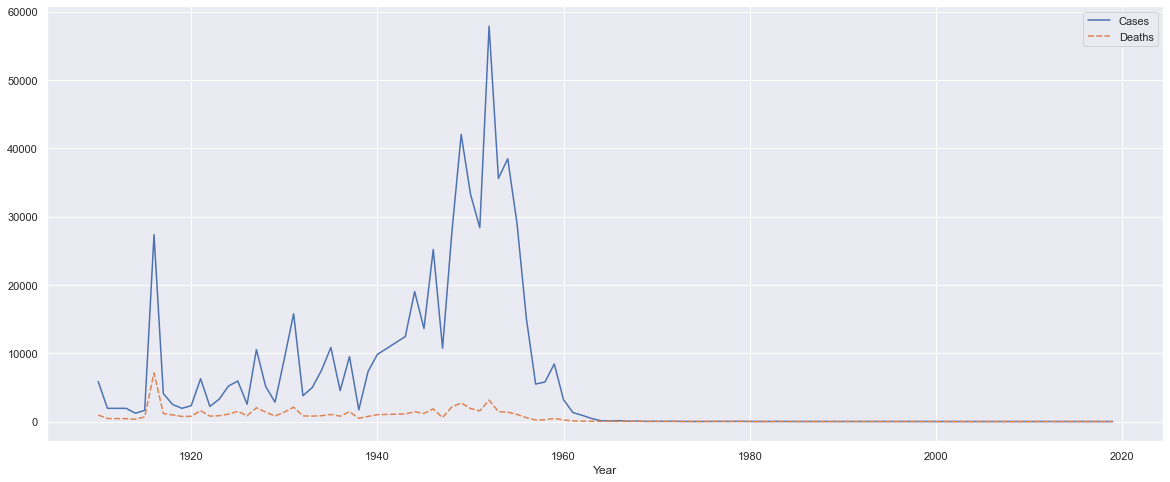

In [221]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=dados[['Cases', 'Deaths']]);

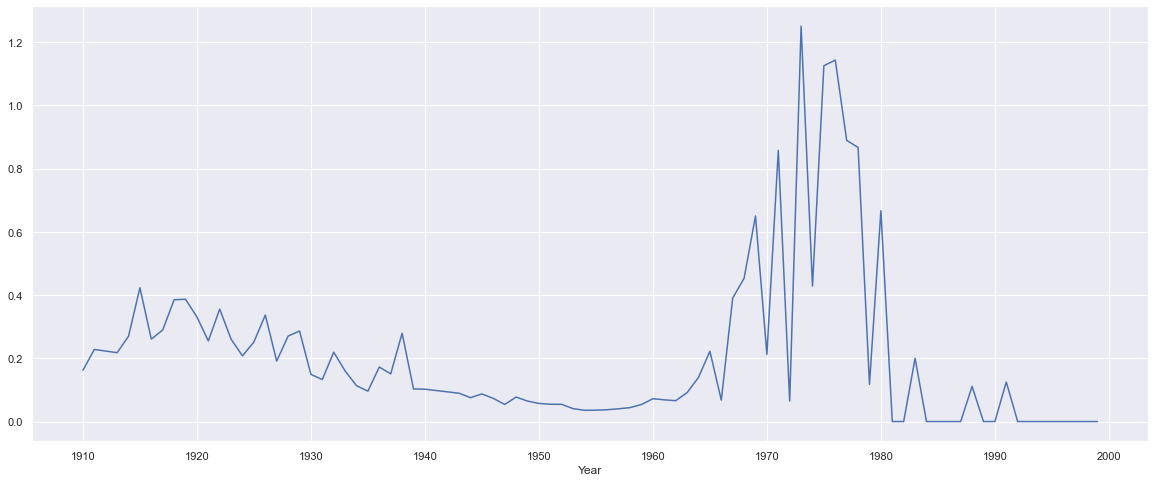

In [222]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=dados.Deaths/dados.Cases);

In [223]:
dados['Taxa'] = dados.Deaths/dados.Cases
dados = dados.dropna()

In [224]:
from pmdarima import auto_arima, ARIMA as AUTOARIMA

auto_arima_model: AUTOARIMA = auto_arima(dados.Taxa)

auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   87
Model:               SARIMAX(1, 0, 2)   Log Likelihood                  36.805
Date:                Wed, 08 Feb 2023   AIC                            -63.609
Time:                        18:00:55   BIC                            -51.280
Sample:                             0   HQIC                           -58.645
                                 - 87                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0471      0.046      1.024      0.306      -0.043       0.137
ar.L1          0.7600      0.092      8.240      0.000       0.579       0.941
ma.L1         -0.6511      0.093     -7.008      0.000      -0.833      -0.469
ma.L2          0.7784      0.062     12.638      0.000       0.658       0.899
sigma2         0.0243      0.002     12.186      0.000       0.020       0.028
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               408.91
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               7.53   Skew:                             1.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

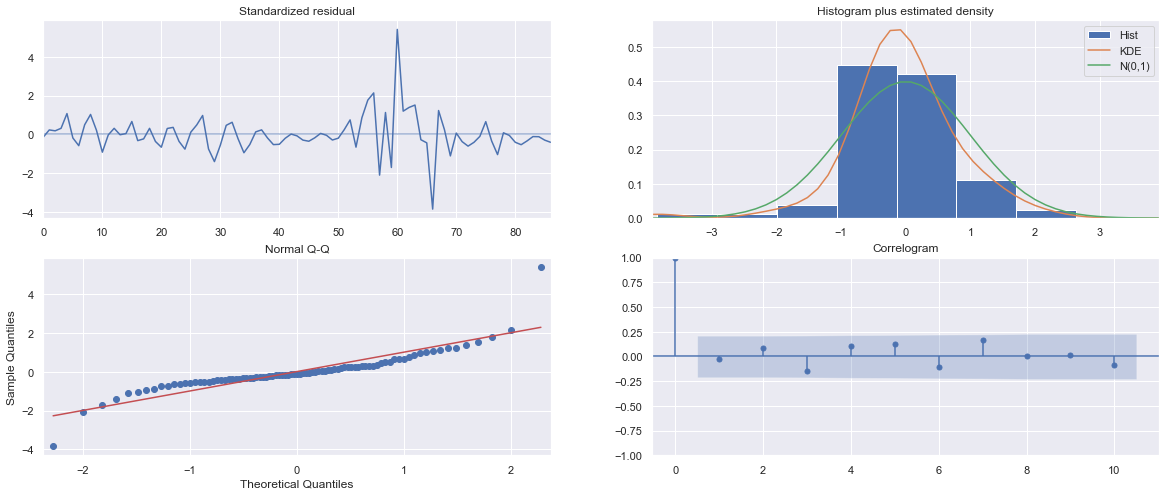

In [225]:
auto_arima_model.plot_diagnostics(figsize=(20, 8));

In [226]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposição = seasonal_decompose(dados)

decomposição

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None